In [241]:
import numpy as np
import pandas as pd

In [242]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [243]:
df.sample(100)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4625,ham,Lol ... I knew that .... I saw him in the doll...,NaN,NaN,NaN
2716,ham,"House-Maid is the murderer, coz the man was mu...",NaN,NaN,NaN
2759,ham,"Can meh? Thgt some will clash... Really ah, i ...",NaN,NaN,NaN
2967,ham,"Mostly sports type..lyk footbl,crckt..",NaN,NaN,NaN
3341,ham,You will go to walmart. I.ll stay.,NaN,NaN,NaN
...,...,...,...,...,...
2597,ham,"Got fujitsu, ibm, hp, toshiba... Got a lot of ...",NaN,NaN,NaN
85,ham,"I call you later, don't have network. If urgnt...",NaN,NaN,NaN
1255,ham,Just wait till end of march when el nino gets ...,NaN,NaN,NaN
3294,ham,Dunno lei Ì_ all decide lor. How abt leona? Oo...,NaN,NaN,NaN


In [244]:
##DataCleaning

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [246]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [247]:
df.sample(10)

,v1,v2
690,ham,Was the farm open?
1733,spam,"Hi, this is Mandy Sullivan calling from HOTMIX..."
2736,ham,Really? I crashed out cuddled on my sofa.
83,ham,You will be in the place of that man
2783,ham,"Just arrived, see you in a couple days &lt;3"
3797,ham,"Feb &lt;#&gt; is \I LOVE U\"" day. Send dis t..."
4589,ham,Tomorrow i am not going to theatre. . . So i c...
3346,ham,No problem baby. Is this is a good time to tal...
1236,ham,How much are we getting?
680,ham,What is this 'hex' place you talk of? Explain!


In [248]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
3106,ham,Hi. Happy New Year. I dont mean to intrude but...
4387,ham,"see you then, we're all christmassy here!"
3270,spam,You have 1 new voicemail. Please call 08719181...
5337,ham,My birthday is on feb &lt;#&gt; da. .
2580,spam,U are subscribed to the best Mobile Content Se...
3516,ham,So you think i should actually talk to him? No...
4180,ham,"Ok da, i already planned. I wil pick you."
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...
2663,spam,8007 FREE for 1st week! No1 Nokia tone 4 ur mo...
2384,ham,"Sorry, I'll call later"


In [249]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [250]:
df['target']=encoder.fit_transform(df['target'])

In [251]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [252]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [253]:
#check for duplicate values
df.duplicated().sum()

403

In [254]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [255]:
df.duplicated().sum()

0

In [256]:
df.shape

(5169, 2)

In [257]:
#EDA--exploratory data analysis

In [258]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [259]:
!pip install nltk

In [260]:
import nltk

In [261]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\RITTIKA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [262]:
df = df.copy()
df['num_characters'] = df['text'].apply(len)


In [263]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [264]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [265]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [266]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [267]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [268]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [269]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [270]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [271]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

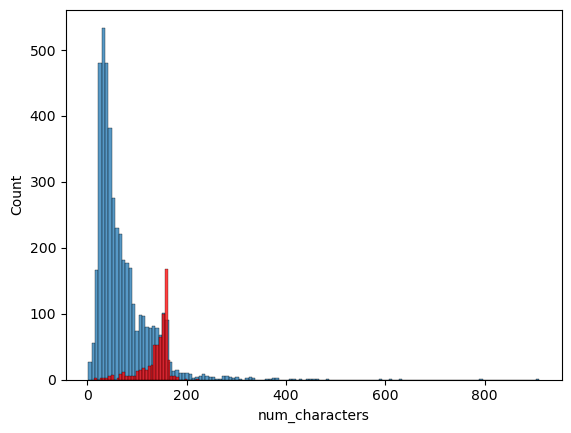

In [272]:

sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\RITTIKA SINGH\AppData\Local\Temp\ipykernel_30344\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

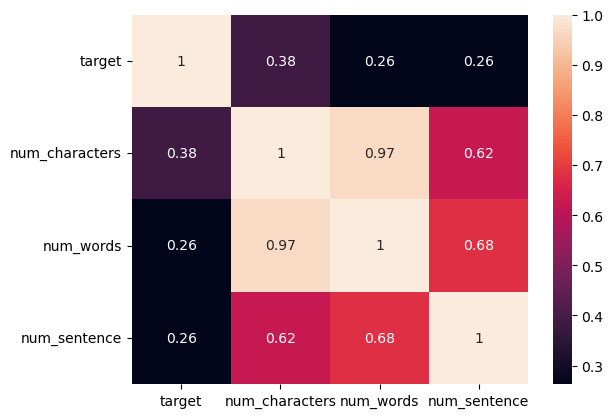

In [273]:
sns.heatmap(df.corr(),annot=True)

In [274]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [275]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\RITTIKA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [276]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [277]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [278]:
transform_text('I loved the youtube lecture. how about you? ')

'love youtub lectur'

In [279]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('singing')

'sing'

In [307]:
from sklearn.utils import resample
df['transformed_text']=df['text'].apply(transform_text)
spam_df = df[df['target'] == 1]
ham_df = df[df['target'] == 0]
spam_upsampled = resample(spam_df,
                          replace=True,
                          n_samples=len(ham_df),
                          random_state=42)
df_balanced = pd.concat([ham_df, spam_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [308]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [309]:
!pip install wordcloud


In [310]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [311]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

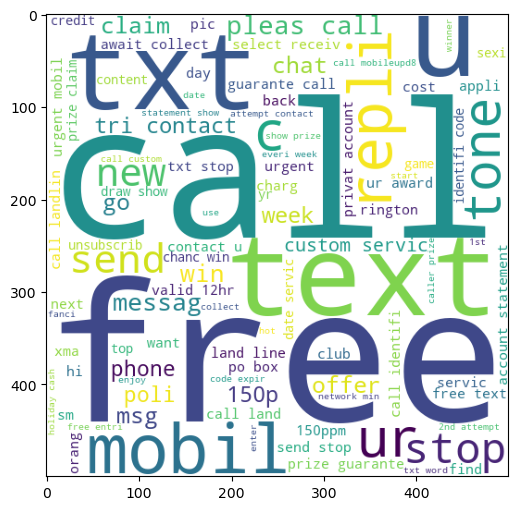

In [312]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [313]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

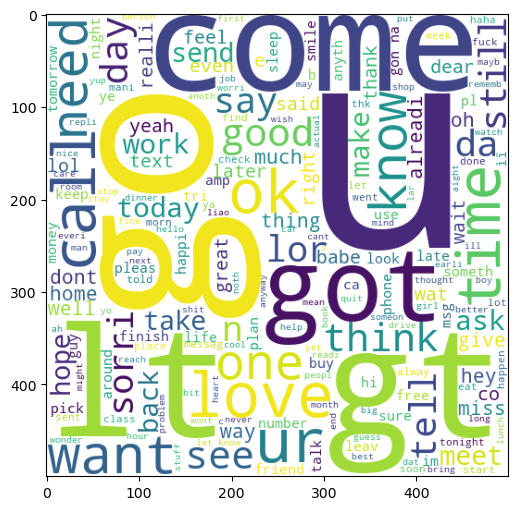

In [314]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [315]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [316]:
len(spam_corpus)

9939

In [317]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

In [318]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [319]:
len(ham_corpus)

35404

In [320]:
pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

0     883
1     404
2     349
3     288
4     287
5     284
6     275
7     236
8     236
9     234
10    233
11    219
12    217
13    216
14    213
15    208
16    197
17    190
18    170
19    165
20    159
21    156
22    152
23    149
24    147
25    143
26    143
27    142
28    133
29    129
Name: 1, dtype: int64

In [321]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [322]:
X=tfidf.fit_transform(df_balanced['transformed_text']).toarray()

In [323]:
X.shape

(9032, 6708)

In [324]:
y=df_balanced['target'].values

In [325]:
y

array([0, 1, 1, ..., 1, 0, 1])

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [328]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [329]:

mnb= MultinomialNB()


In [330]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9784172661870504
[[857  26]
 [ 13 911]]
0.9722518676627535


In [331]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [305]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64